## Business Case:- Email Spam Detection System

## Business Problem
* Enterprises receive thousands of emails daily, including internal communications, customer inquiries, and marketing emails. However, a significant portion of these emails are spam, which can lead to:

1. Productivity loss as employees manually filter emails.
2. Security risks due to phishing, malware, and scams.
3. Increased storage and bandwidth costs.

## Domain Analysis

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [162]:
data = pd.read_csv("email.csv")
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Basic check

In [163]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [164]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [165]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [166]:
data.describe(include="O")

,Email No.
count,5172
unique,5172
top,Email 1
freq,1


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


## Feature Engineering

* Feature Engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. It involves selecting, creating, or modifying variables to improve predictive accuracy. This can include techniques such as handling missing values, encoding categorical variables, scaling numerical features, creating interaction terms, and extracting domain-specific insights. Effective feature engineering helps models capture relevant patterns, reduces noise, and improves generalization to unseen data. It is a crucial step in the machine learning pipeline, often requiring domain knowledge and experimentation to achieve optimal results.

### 1. Data Preprocessing

* Data Preprocessing is the process of cleaning, transforming, and organizing raw data into a structured format suitable for machine learning models. It involves multiple steps such as handling missing values, removing duplicates, correcting inconsistencies, normalizing or standardizing numerical data, encoding categorical variables, and reducing dimensionality. Additionally, techniques like feature scaling, outlier detection, and text or image preprocessing may be applied depending on the data type. Proper data preprocessing ensures that the dataset is clean, consistent, and optimized for better model performance, reducing biases and improving accuracy in predictions.

#### I. Null Values
* Null values, also known as missing values, occur in a dataset when no data is recorded for a particular cell. They can arise due to various reasons, such as incomplete data entry, system errors, or data corruption. Handling null values is crucial in data preprocessing because they can impact the performance of machine learning models and statistical analysis. Common techniques to deal with null values include removing rows or columns with excessive missing data, filling them with statistical measures like mean, median, or mode, or using predictive models to estimate the missing values. Properly managing null values ensures data consistency, improves model accuracy, and enhances the overall reliability of analytical insights.

In [168]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [169]:
null_col = []
for i in data.columns:
    if data[i].isnull().sum() > 1:
        null_col.append(i)
print(null_col)

[]


In [170]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### II. Outliers
* Outliers are data points that significantly differ from the rest of the dataset. They are unusually high or low values that can distort statistical analysis and impact machine learning model performance. Outliers can result from errors in data collection, measurement anomalies, or natural variations in the data. Detecting outliers is essential to ensure data quality, and common methods include the Interquartile Range (IQR) method, Z-score method, and visualization techniques like box plots and scatter plots. Handling outliers involves removing them, replacing them with statistical measures (like the median), or transforming the data to reduce their impact. Proper outlier management improves the accuracy and reliability of data-driven decisions.

In [171]:
for col in data.columns:  # Loop through all columns
        if data[col].dtype in ['int64', 'float64']:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)  # First quartile
            Q3 = data[col].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            median_value = data[col].median()  # Compute median of column
            
            # Replace outliers with the median
            for i in range(len(data[col])):
                if data[col][i] < lower_bound or data[col][i] > upper_bound:
                    data.at[i, col] = median_value  # Replace using `.at[]`
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,1,6,6,2,102,1,0,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,1,0,5,1,51,2,0,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,1,1,5,2,57,0,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
data["Prediction"].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

#### III. Encoding
* Encoding is the process of converting categorical data into a numerical format so that machine learning models can interpret it. Since most algorithms work with numerical data, categorical variables (such as "Yes/No" or "Red/Blue/Green") need to be transformed into numbers. There are different types of encoding techniques, including Label Encoding, which assigns a unique integer to each category, and One-Hot Encoding, which creates binary columns for each category. Other methods like Ordinal Encoding, Binary Encoding, and Target Encoding are used depending on the data and model requirements. Proper encoding ensures that categorical data is effectively utilized in predictive modeling, improving model performance and accuracy.

In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Email No."] = le.fit_transform(data["Email No."])

In [174]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,1,6,6,2,102,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,1,0,5,1,51,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,1,1,5,2,57,0,0,...,0,0,0,0,0,0,0,1,0,0


### 2. Feature Selection

* Feature selection is the process of identifying and selecting the most relevant features (independent variables) from a dataset to improve machine learning model performance. It helps in reducing dimensionality, removing irrelevant or redundant features, and improving computational efficiency. Selecting the right features can enhance model accuracy, prevent overfitting, and speed up training time.

In [50]:
def find_high_correlation(data, threshold=0.9):
    
    corr_matrix = data.corr()  # Compute correlation matrix
    high_corr_columns = set()  # Store columns with high correlation

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):  # Avoid duplicate pairs
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation > 90%
                high_corr_columns.add(corr_matrix.columns[j])  # Add second column

    return list(high_corr_columns)  # Return list of highly correlated columns

# Example Usage
highly_correlated_cols = find_high_correlation(data, threshold=0.9)
print("Columns with high correlation (above 90%):", highly_correlated_cols)

Columns with high correlation (above 90%): ['his', 'rom', 'lease', 'hanks', 'wil']


In [51]:
data.drop(['his', 'rom', 'lease', 'hanks', 'wil'],axis=1,inplace=True)

## Model Creation

* Model creation is the process of building, training, and evaluating a machine learning model to solve a specific problem. It begins with data preprocessing, where raw data is cleaned, transformed, and handled for missing values and outliers. Next, feature engineering and selection are performed to create meaningful features and choose the most relevant ones. The appropriate machine learning algorithm is then selected based on the problem type, such as classification, regression, or clustering. The model is trained using historical data, where it learns patterns and relationships through optimization techniques like gradient descent or backpropagation. To improve performance, hyperparameter tuning is conducted by adjusting parameters like learning rate, depth, or the number of layers. The model is then evaluated using performance metrics such as accuracy, precision, recall, RMSE, or F1-score to ensure it generalizes well to new data. Finally, the trained model is deployed into a real-world application using frameworks like Flask, FastAPI, or cloud platforms. Effective model creation leads to accurate predictions and helps in making data-driven decisions for business or research applications. 

In [175]:
x = data.drop(["Prediction"],axis=1)
y = data["Prediction"]

In [176]:
x

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,1,6,6,2,102,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,1,0,5,1,51,2,0,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,1,1,5,2,57,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,4632,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,4633,3,3,1,2,6,5,28,4,0,...,0,0,0,0,0,0,0,0,1,0
5169,4635,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,4636,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,0,1,0


In [177]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [179]:
x_train

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2382,1538,3,3,1,1,2,2,28,7,0,...,0,0,0,0,0,0,0,0,1,0
3848,3166,3,3,1,1,7,1,28,1,0,...,0,0,0,0,0,0,0,0,0,0
667,4804,1,3,1,0,1,0,10,1,0,...,0,0,0,0,0,0,0,0,0,0
4641,4048,14,11,1,5,4,1,72,1,0,...,0,0,0,0,0,0,0,0,0,0
3650,2947,6,5,1,3,2,3,38,3,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4370,17,3,1,5,4,5,100,1,1,...,0,0,0,0,0,0,0,0,0,0
3264,2518,0,3,1,1,1,0,9,2,0,...,0,0,0,0,0,0,0,0,0,0
1653,728,12,3,8,1,2,5,28,1,2,...,0,0,0,0,0,0,0,0,2,0
2607,1788,10,6,1,1,5,2,123,0,0,...,0,0,0,0,0,0,0,0,1,0


In [180]:
x_test

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
3324,2585,14,7,2,2,2,4,37,0,1,...,0,0,0,0,0,0,0,0,0,0
15,667,6,2,1,0,2,0,36,3,1,...,0,0,0,0,0,0,0,0,0,0
4950,4391,3,6,4,6,5,1,130,3,0,...,0,0,0,0,0,0,0,0,1,0
3964,3295,3,3,1,1,7,1,28,1,0,...,0,0,0,0,0,0,0,0,0,0
2315,1464,8,14,8,3,3,0,87,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2837,0,0,1,0,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,134,2,3,4,3,2,0,41,2,0,...,0,0,0,0,0,0,0,0,0,0
2239,1380,3,1,1,1,2,0,22,2,0,...,0,0,0,0,0,0,0,0,0,0
1511,571,8,3,1,4,2,1,47,0,0,...,0,0,0,0,0,0,0,0,0,0


#### SMOTE Technique (Synthetic Minority Over-sampling Technique)

* SMOTE is a data balancing technique used in machine learning to handle imbalanced datasets, where one class has significantly fewer samples than the other. Instead of simply duplicating minority class samples, SMOTE generates synthetic samples by interpolating between existing minority class data points.

In [181]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_smote,y_train_smote = sm.fit_resample(x_train,y_train)

In [182]:
from collections import Counter
print("Before",Counter(y_test))
print("After",Counter(y_train_smote))

Before Counter({0: 929, 1: 364})
After Counter({0: 2743, 1: 2743})


## Model Selection

* Model selection is the process of choosing the best machine learning model for a given problem based on performance metrics and dataset characteristics. Different models have varying strengths, and selecting the right one ensures higher accuracy, better generalization, and efficient computation. The process involves evaluating multiple algorithms using techniques like cross-validation, grid search, and performance metrics (e.g., accuracy, precision, recall, RMSE, AUC-ROC). Factors like dataset size, feature complexity, interpretability, and computational cost play a crucial role in the selection. Common approaches include:

### Logistic Regression Algorithm

* Logistic Regression is a supervised machine learning algorithm used for binary classification problems, where the target variable has two possible outcomes (e.g., spam or not spam, fraud or not fraud). Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts probabilities and classifies data points using a sigmoid function.

In [189]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

#### Logistice Regression Metrics

* Logistic Regression metrics are used to evaluate the performance of a classification model, particularly for binary classification problems. Accuracy is a commonly used metric that measures the percentage of correctly classified instances, but it can be misleading for imbalanced datasets. Precision calculates how many of the predicted positive cases are actually correct, making it useful in scenarios where false positives need to be minimized, such as spam detection. Recall (Sensitivity), on the other hand, measures how many actual positive cases were correctly identified by the model, which is crucial in applications like medical diagnosis, where missing a positive case can have severe consequences. F1-score, which is the harmonic mean of precision and recall, provides a balanced measure when there is an uneven class distribution. Additionally, AUC-ROC (Area Under the Receiver Operating Characteristic Curve) helps assess the model’s ability to differentiate between classes across different probability thresholds. Selecting the right metric depends on the specific problem, data distribution, and business objectives.

In [190]:
from sklearn.metrics import *

In [191]:
y_lr = LR.predict(x_test)

In [346]:
a1 = accuracy_score(y_test,y_lr)
a1

0.8298530549110595

In [193]:
y_tlr =LR.predict(x_train)

In [347]:
t1 = accuracy_score(y_train,y_tlr)
t1

0.8350090229440578

In [195]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       929
           1       0.75      0.60      0.66       364

    accuracy                           0.83      1293
   macro avg       0.80      0.76      0.77      1293
weighted avg       0.82      0.83      0.82      1293



### SVM Algorithm :- (Support Vectore Machine)

* SVC, or Support Vector Classification, is a machine learning algorithm based on Support Vector Machines (SVM) used for classification tasks. It aims to find the optimal decision boundary (hyperplane) that best separates different classes in a dataset.

In [196]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_smote,y_train_smote)

SVC()

In [197]:
y_svm = svm.predict(x_test)

In [348]:
a2 = accuracy_score(y_test,y_svm)
a2

0.5622583139984532

In [199]:
y_tsvm = svm.predict(x_train)

In [350]:
t2 = accuracy_score(y_train,y_tsvm)
t2

0.5748904356792988

In [201]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67       929
           1       0.29      0.39      0.33       364

    accuracy                           0.56      1293
   macro avg       0.51      0.51      0.50      1293
weighted avg       0.60      0.56      0.58      1293



### Decision Tree Algorithm

* A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It works by splitting the dataset into smaller subsets based on feature values, forming a tree-like structure where each internal node represents a decision based on a feature, each branch represents an outcome, and each leaf node represents a final class label (in classification) or a numerical value (in regression).

In [211]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [212]:
y_dt = dt.predict(x_test)

In [213]:
accuracy_score(y_test,y_dt)

0.8422273781902552

In [214]:
y_tdt = dt.predict(x_train)

In [215]:
accuracy_score(y_train,y_tdt)

1.0

In [216]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       929
           1       0.71      0.76      0.73       364

    accuracy                           0.84      1293
   macro avg       0.80      0.82      0.81      1293
weighted avg       0.85      0.84      0.84      1293



#### Hyperparameter Tuning

* Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Hyperparameters are external configurations of a model that are set before training (e.g., learning rate, number of trees in a forest, or depth of a decision tree). Unlike model parameters, hyperparameters are not learned from data but must be manually set or optimized using techniques like Grid Search or Randomized Search.

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define the hyperparameter grid
param_dist = {
    "criterion": ["gini", "entropy"],  # Keeps the best split criteria
    "splitter": ["best"],  # "random" leads to instability
    "max_depth": [5, 10,],  # Restricting depth to avoid overfitting
    "min_samples_split": [10, 20,],  # Larger values prevent deep splits
    "min_samples_leaf": [5, 10, 7],  # Ensures each leaf has enough data
    "max_features": ["sqrt", "log2"],  # Reduces variance by limiting feature selection
    "ccp_alpha": [0.001, 0.01, 0.1]  # Cost Complexity Pruning (important for reducing overfitting)
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    dt, param_distributions=param_dist, n_iter=50, cv=5, random_state=0, n_jobs=-1
)

# Fit the model
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.01, 0.1],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 7],
                                        'min_samples_split': [10, 20],
                                        'splitter': ['best']},
                   random_state=0)

In [283]:
y_hdt = random_search.predict(x_test)

In [351]:
a3 = accuracy_score(y_test,y_hdt)
a3

0.7548337200309359

In [285]:
y_thdt = random_search.predict(x_train)

In [352]:
t3 = accuracy_score(y_train,y_thdt)
t3

0.777262180974478

### Bagging Algorithm

* Bagging (Bootstrap Aggregating) is an ensemble learning technique that improves the accuracy and stability of machine learning models by combining multiple models trained on different subsets of the dataset. It reduces variance and prevents overfitting, making models more robust.

* In Bagging, multiple models (often weak learners, like decision trees) are trained independently on different randomly sampled subsets of the original dataset. Each subset is created using bootstrap sampling (sampling with replacement). The final prediction is made by averaging the predictions (for regression) or using majority voting (for classification).

In [217]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()
bg.fit(x_train_smote,y_train_smote)

BaggingClassifier()

In [218]:
y_bg = bg.predict(x_test)

In [219]:
accuracy_score(y_test,y_bg)

0.877030162412993

In [220]:
y_tbg = bg.predict(x_train)

In [221]:
accuracy_score(y_train,y_tbg)

0.994328435163702

In [222]:
print(classification_report(y_test,y_bg))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       929
           1       0.78      0.78      0.78       364

    accuracy                           0.88      1293
   macro avg       0.85      0.85      0.85      1293
weighted avg       0.88      0.88      0.88      1293



#### Hyperparameter of Bagging Algorithm

In [297]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Define Bagging Classifier
hbg = BaggingClassifier(estimator=base_estimator, random_state=42)

# Hyperparameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 400],  # Increase estimators for stability
    "max_samples": [0.7, 0.8, 0.9, 1.0],  # Use more samples per tree
    "max_features": [0.5, 0.7, 0.8],  # Reduce features to avoid memorization
    "bootstrap": [True],  # Keep Bootstrap (random sampling helps generalization)
    "bootstrap_features": [False],  # Avoid random feature resampling to keep stability
    "estimator__max_depth": [4, 6, 8, 10],  # Reduce tree depth to avoid overfitting
    "estimator__min_samples_split": [5, 10, 20],  # Avoid aggressive splits
    "estimator__min_samples_leaf": [3, 5, 10]  # Ensure leaves contain enough samples
}

# RandomizedSearchCV
random_search1 = RandomizedSearchCV(
    hbg, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=0
)

# Fit the model (Use your dataset instead of X_train, y_train)
random_search1.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                               random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'bootstrap_features': [False],
                                        'estimator__max_depth': [4, 6, 8, 10],
                                        'estimator__min_samples_leaf': [3, 5,
                                                                        10],
                                        'estimator__min_samples_split': [5, 10,
                                                                         20],
                                        'max_features': [0.5, 0.7, 0.8],
                                        'max_samples': [0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [298]:
y_hbg = random_search1.predict(x_test)

In [353]:
a4 = accuracy_score(y_test,y_hbg)
a4

0.8894044856921887

In [300]:
y_thbg = random_search1.predict(x_train)

In [354]:
t4 = accuracy_score(y_train,y_thbg)
t4

0.9786027326630575

### Random Forest Algorithm

* Random Forest is a supervised machine learning algorithm that belongs to the ensemble learning family. It is based on the Bagging (Bootstrap Aggregating) technique and consists of multiple decision trees working together to improve accuracy and reduce overfitting.

In [223]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [224]:
y_rm = rm.predict(x_test)

In [355]:
a5 = accuracy_score(y_test,y_rm)
a5

0.8924980665119876

In [226]:
y_trm = rm.predict(x_train)

In [356]:
t5 = accuracy_score(y_train,y_trm)
t5

1.0

In [228]:
print(classification_report(y_test,y_rm))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       929
           1       0.78      0.85      0.82       364

    accuracy                           0.89      1293
   macro avg       0.86      0.88      0.87      1293
weighted avg       0.90      0.89      0.89      1293



## Hyperparameter of Random Forest Algorithm

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter search space
param_dist = {
    "n_estimators": np.arange(100, 1001, 100),  # Number of trees
    "max_depth": [None, 10, 20, 30, 40, 50],   # Tree depth
    "min_samples_split": [2, 5, 10],           # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],             # Min samples per leaf
    "bootstrap": [True, False]                 # Bootstrapping
}

# Initialize Random Forest Classifier
hrf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search4 = RandomizedSearchCV(
    estimator=hrf, 
    param_distributions=param_dist,
    n_iter=10,  # Number of random searches
    scoring="accuracy",
    cv=5,       # 5-Fold Cross-validation
    verbose=2,  
    n_jobs=-1,  # Use all processors
    random_state=42
)

random_search4.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, scoring='accuracy', verbose=2)

In [358]:
y_hrm = random_search4.predict(x_test)

In [362]:
a6 = accuracy_score(y_test,y_hrm)
a6

0.9079659706109822

In [360]:
y_thrm = random_search4.predict(x_train)

In [363]:
t6 = accuracy_score(y_train,y_thrm)
t6

0.9989688063934004

### Gradiant Boosting Algorithm

* Gradient Boosting is a supervised machine learning technique used for both classification and regression tasks. It is an ensemble learning method that builds models sequentially, where each new model corrects the errors of the previous ones. Unlike Bagging (Random Forest), which reduces variance, Gradient Boosting focuses on reducing bias by optimizing model performance.

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [230]:
y_gb = gb.predict(x_test)

In [364]:
a7 = accuracy_score(y_test,y_gb)
a7

0.8909512761020881

In [232]:
y_tgb = gb.predict(x_train)

In [365]:
t7 = accuracy_score(y_train,y_tgb)
t7

0.9448311420469193

In [234]:
print(classification_report(y_test,y_gb))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       929
           1       0.83      0.76      0.80       364

    accuracy                           0.89      1293
   macro avg       0.87      0.85      0.86      1293
weighted avg       0.89      0.89      0.89      1293



### XGBoost Algorithm

* XGBoost (Extreme Gradient Boosting) is an advanced gradient boosting algorithm designed to be fast, efficient, and highly accurate. It is widely used in machine learning competitions (like Kaggle) and real-world applications due to its superior performance over traditional boosting methods.

In [235]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [236]:
y_xgb = xgb.predict(x_test)

In [366]:
a8 = accuracy_score(y_test,y_xgb)
a8

0.9242072699149265

In [238]:
y_txgb = xgb.predict(x_train)

In [367]:
t8 = accuracy_score(y_train,y_txgb)
t8

1.0

In [240]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       929
           1       0.88      0.84      0.86       364

    accuracy                           0.92      1293
   macro avg       0.91      0.90      0.91      1293
weighted avg       0.92      0.92      0.92      1293



In [307]:
from sklearn.model_selection import RandomizedSearchCV

# Define base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Define Bagging Classifier
hxgb = XGBClassifier(estimator=base_estimator, random_state=0)

# Hyperparameter grid
param_dist = {
    "n_estimators": [50, 100, 200],  # Reduce number of trees to prevent overfitting
    "learning_rate": [0.01, 0.03, 0.05],  # Lower values prevent overfitting
    "max_depth": [3, 4, 5],  # Shallow trees generalize better
    "min_child_weight": [5, 10, 20],  # Larger values prevent small splits (reduce overfitting)
    "gamma": [0.2, 0.3, 0.5],  # Higher values stop unnecessary splits
    "subsample": [0.5, 0.6, 0.7],  # Use a fraction of training data per tree
    "colsample_bytree": [0.5, 0.6, 0.7],  # Use a fraction of features per tree
    "reg_alpha": [1, 2, 5],  # Stronger L1 regularization (Lasso) to penalize complexity
    "reg_lambda": [2, 5, 10],  # Stronger L2 regularization (Ridge) to prevent overfitting
}


# RandomizedSearchCV
random_search2 = RandomizedSearchCV(
    hxgb, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=0
)

# Fit the model (Use your dataset instead of X_train, y_train)
random_search2.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           estimator=DecisionTreeClassifier(),
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interac...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7],
                                        'gamma': [0.2, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [5, 10, 20],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [1, 2, 5],
                                        'reg_lambda': [2, 5, 10],
                                        'subsample': [0.5, 0.6, 0.7]},
                   random_state=0)

In [308]:
y_hxgb = random_search2.predict(x_test)

In [368]:
a9 = accuracy_score(y_test,y_hxgb)
a9

0.888631090487239

In [310]:
y_thxgb = random_search2.predict(x_train)

In [369]:
t9 = accuracy_score(y_train,y_thxgb)
t9

0.9321990203660737

### ANN:- Artificial Neural Netweork Algorithm

* An Artificial Neural Network (ANN) is a machine learning model inspired by the structure and function of the human brain. It consists of multiple layers of neurons that process and learn patterns from data. ANNs are widely used in deep learning for tasks like image recognition, natural language processing, and financial forecasting.

In [241]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(x_train,y_train)

MLPClassifier()

In [242]:
y_ann = ann.predict(x_test)

In [370]:
a10 = accuracy_score(y_test,y_ann)
a10

0.880123743232792

In [244]:
y_tann = ann.predict(x_train)

In [371]:
t10 = accuracy_score(y_train,y_tann)
t10

0.8963650425367363

In [246]:
print(classification_report(y_test,y_ann))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       929
           1       0.76      0.84      0.80       364

    accuracy                           0.88      1293
   macro avg       0.85      0.87      0.86      1293
weighted avg       0.89      0.88      0.88      1293



## Model Comparison Report  

In [374]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","SVM Algorithm","DecisionTreeClassifier","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","ANN_MLPClassifer Algorithm"],
                     "Accuracy_Score":[a1*100,a2*100,a3*100,a4*100,a6*100,a7*100,a9*100,a10*100],
                      "Traning Accuracy_score":[t1*100,t2*100,t3*100,t4*100,t6*100,t7*100,t9*100,t10*100]})
score

,Model,Accuracy_Score,Traning Accuracy_score
0,LogisticRegression,82.985305,83.500902
1,SVM Algorithm,56.225831,57.489044
2,DecisionTreeClassifier,75.483372,77.726218
3,Bagging Algorithm,88.940449,97.860273
4,RandomForestClassifier,90.796597,99.896881
5,GradiantBoosting Algorithm,89.095128,94.483114
6,XGBClassifirer Algorithm,88.863109,93.219902
7,ANN_MLPClassifer Algorithm,88.012374,89.636504


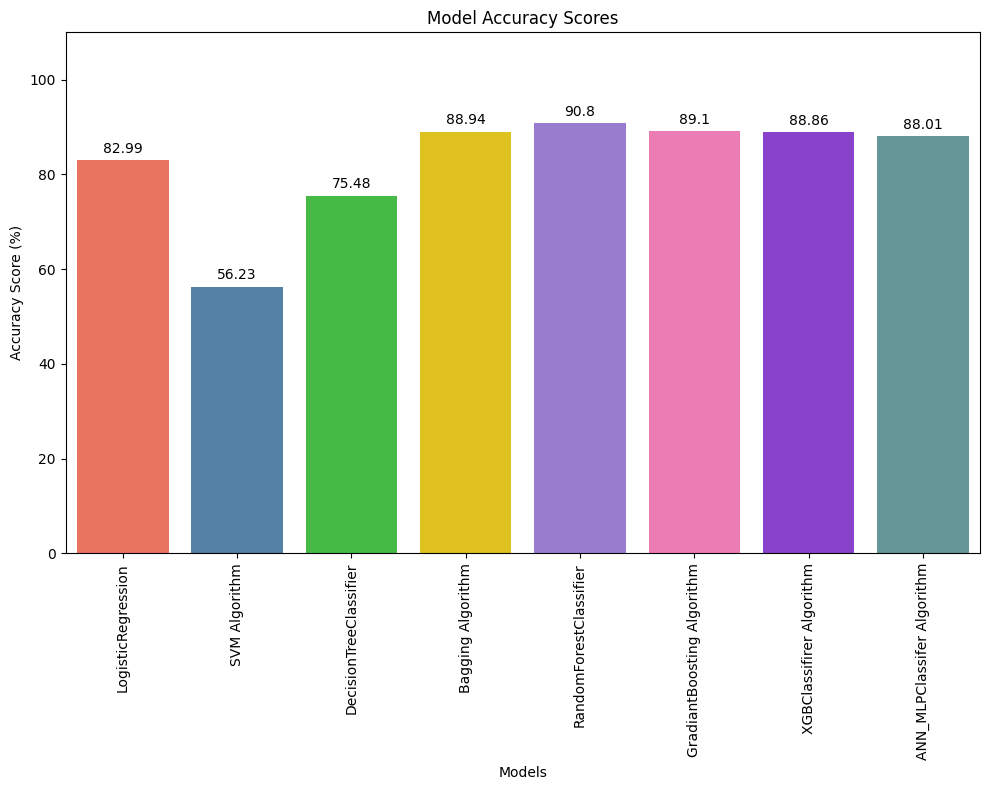

In [375]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 8))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

## Model Save

In [316]:
import pickle
with open("email.pkl","wb") as f:
    pickle.dump(gb,f)

In [317]:
with open("email.pkl","rb") as f:
    file = pickle.load(f)

In [318]:
file

GradientBoostingClassifier()

#### Predict the Value Based on train data

In [323]:
pd.set_option("display.max_columns",None)

In [324]:
x_train.head()

Email No.  the  to  ect  and  for  of   a  you  hou  in  on  is  this  \
2382       1538    3   3    1    1    2   2  28    7    0   5   5   2     0   
3848       3166    3   3    1    1    7   1  28    1    0   5   5   2     1   
667        4804    1   3    1    0    1   0  10    1    0   4   1   2     1   
4641       4048   14  11    1    5    4   1  72    1    0  17   7   2     0   
3650       2947    6   5    1    3    2   3  38    3    0   6   9   2     1   

      enron   i  be  that  will  have  with  your  at  we   s  are  it  by  \
2382      0  22   1     0     2     0     0     1   3   1  20    0  12   1   
3848      0  22  10     0     1     2     0     0   3   1  20    4   2   0   
667       0  16   1     0     0     0     0     1   0   1  16    0   3   0   
4641      0  60   3     1     0     1     0     1   5   1  58    1   9   1   
3650      0  22   1     2     1     0     0     0   7   3  23    0   5   0   

      com  as  from  gas  or  not  me  deal  if  meter  hpl  please  re    e  \
2382    0   2     2    0   4    0   3     0   5      0    0       2   5   42   
3848    0   2     2    0  19    0   8     0   1      0    0       0   5   42   
667     2   0     1    0   3    0   1     0   0      0    0       0   2   21   
4641    0  11     0    0  11    0  11     0   1      0    0       0   5  104   
3650    0   5     1    0   6    2   5     0   0      0    0       1   5   47   

      any  our  corp  can   d  all  has  was  know  need  an  forwarded  new  \
2382    1    4     0    1  12    0    2    0     0     0   5          0    0   
3848    0    0     0    1  12    4    2    0     0     0   5          0    0   
667     0    3     0    0   5    0    0    0     0     0   1          0    0   
4641    0    5     0    1  32    5    1    0     0     0   8          0    0   
3650    1    1     0    1  12    1    0    0     0     0   8          0    0   

       t  may  up  j  mmbtu  should  do  am  get  out  see  no  there  price  \
2382  29    0   0  2      0       0   2   5    0    0    0   2      0      0   
3848  29    0   2  5      0       0   1   3    0    0    0   8      0      0   
667   16    0   1  2      0       0   1   0    0    0    0   0      0      0   
4641  78    0   0  6      0       0   0   2    0    2    0   5      0      0   
3650  42    0   0  5      0       0   0   1    0    2    0   3      0      0   

      daren  but  been  company   l  these  let  so  would   m  into  xls  \
2382      0    0     0        0  16      0    2   5      0  11     0    0   
3848      0    0     0        0  16      0    1   1      0  40     0    0   
667       0    0     0        0  11      0    0   1      0   8     0    0   
4641      0    0     0        0  51      0    1   4      0  33     0    0   
3650      0    0     0        0  21      0    1   5      0  11     0    0   

      farmer  attached  us  information  they  message  day  time  my  one  \
2382       0         0   1            0     0        0    0     0   0    1   
3848       0         0   1            0     0        0    2     0   0    0   
667        0         0   0            0     0        0    0     0   0    0   
4641       0         0   5            0     0        0    1     0   0    0   
3650       0         0   3            0     0        0    1     0   0    2   

      what  only  http  th  volume  mail  contract  which  month  more  \
2382     0     0     0   6       0     0         0      0      0     0   
3848     0     0     0   6       0     0         0      0      0     0   
667      0     0     0   3       0     0         0      0      0     0   
4641     0     0     0  22       0     0         0      0      0     0   
3650     0     0     0   9       0     0         0      0      0     0   

      robert  sitara  about  texas  nom  energy  pec  questions  www  deals  \
2382       0       0      0      0    0       0    0          0    0      0   
3848       0       0      0      0    0       0    0          0    0      0   
667  

In [322]:
y_train

2382    0
3848    1
667     1
4641    0
3650    1
       ..
4931    0
3264    1
1653    1
2607    0
2732    1
Name: Prediction, Length: 3879, dtype: int64

In [340]:
x_train.shape

(3879, 3001)

In [344]:
first_row_list = x_train.iloc[1].tolist()  # Extract first row and convert to a list
print(first_row_list)  # Output: [1, 2, 3, 4, ...]

[3166, 3, 3, 1, 1, 7, 1, 28, 1, 0, 5, 5, 2, 1, 0, 22, 10, 0, 1, 2, 0, 0, 3, 1, 20, 4, 2, 0, 0, 2, 2, 0, 19, 0, 8, 0, 1, 0, 0, 0, 5, 42, 0, 0, 0, 1, 12, 4, 2, 0, 0, 0, 5, 0, 0, 29, 0, 2, 5, 0, 0, 1, 3, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 16, 0, 1, 1, 0, 40, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 53, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 0, 0, 0, 0, 0, 0, 11, 6, 0, 0, 0, 0, 0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 12, 0,

In [345]:
file.predict([[3166, 3, 3, 1, 1, 7, 1, 28, 1, 0, 5, 5, 2, 1, 0, 22, 10, 0, 1, 2, 0, 0, 3, 1, 20, 4, 2, 0, 0, 2, 2, 0, 19, 0, 8, 0, 1, 0, 0, 0, 5, 42, 0, 0, 0, 1, 12, 4, 2, 0, 0, 0, 5, 0, 0, 29, 0, 2, 5, 0, 0, 1, 3, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 16, 0, 1, 1, 0, 40, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 53, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 13, 0, 0, 0, 0, 0, 0, 11, 6, 0, 0, 0, 0, 0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([1], dtype=int64)

## Challenges faced in Machine Learning Model Development

**1. High Number of Rows** 
* Large datasets with thousands of rows increase computational complexity, making model training slow and resource-intensive. Efficient handling requires batch processing, distributed computing, or data sampling techniques.

**2. Lack of Exploratory Data Analysis (EDA)**
* Without proper EDA, important insights such as missing values, feature distributions, and correlations may go unnoticed, leading to suboptimal model performance. EDA is crucial for understanding data trends and detecting anomalies.

**3. Overfitting**
* A model may learn noise instead of actual patterns, resulting in high accuracy on training data but poor generalization on new data. Techniques like cross-validation, regularization (L1/L2), and pruning can mitigate overfitting.

**4. Data Imbalance**
* When certain classes dominate the dataset, the model may become biased, leading to poor predictions for minority classes. Solutions include resampling methods like SMOTE, class weighting, and anomaly detection techniques.

**5. Feature Selection**
* High-dimensional datasets may contain redundant or irrelevant features, increasing computational cost and reducing model interpretability. Techniques like PCA, Lasso Regression, and feature importance analysis can help select the most relevant features.

**6. Data Preprocessing**
* Raw data often contains noise, missing values, or inconsistent formats. Proper preprocessing, including scaling, normalization, handling missing values, and encoding categorical variables, is essential to ensure the model performs optimally.

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Thank You
</div>